<a href="https://colab.research.google.com/github/GuilhermeBenicio/P1_guilherme_benicio_mineracao/blob/main/Guilherme_Benicio_da_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE P1**

## Análise Exploratória de Dados

Links deste exercício:
- https://www.kaggle.com/datasets/zynicide/wine-reviews
- https://seaborn.pydata.org/
- https://www.wine-searcher.com/critics-17-wine+enthusiast

Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

Uma análise exploratória bem elaborada consiste em algumas etapas:

- Compreensão do negócio
- Compreensão dos dados
- Preparar os dados (limpeza e tratamento)
- Análise de dados (extrair informações relevantes e responder perguntas)
- Avaliação dos resultados

Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

1. De onde vem o melhor vinho ?
2. O preço do vinho está relacionado com a qualidade ?
3. Certas variedades de uvas são de maior qualidade ?
4. Qual é o melhor vinho em cada faixa de preço ?
5. Que palavras são mais utilizadas para descrever um vinho ?

Vamos começar!

# IMPORTAÇÃO DAS BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# CARREGAMENTO DO ARQUIVO CSV

In [ ]:
df = pd.read_csv("/content/winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# MOSTRA TODOS OS NOMES DAS COLUNAS

In [ ]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

# MOSTRA INFORMACOES DA TABELA, COMO DADOS NULL

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


# Gera estatísticas descritivas das colunas numéricas, como média, desvio padrão, mínimo e máximo.

In [ ]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


# Conta a quantidade de vezes que cada país aparece no DataFrame.

In [ ]:
df["country"].value_counts()

,count
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


# Conta a frequência de cada variedade de vinho no conjunto de dados.

In [ ]:
df["variety"].value_counts()

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Cabernet Sauvignon-Barbera,1
Sauvignonasse,1
Forcallà,1


# Faz uma cópia da tabela original

In [ ]:
df1 = df.copy()

# Remove colunas que não são relevantes para a análise

In [ ]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df1.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


In [ ]:
df1.shape

(129971, 8)

In [ ]:
print("{:.0%}".format(df1["price"].count() / df1.shape[0]))

93%


# Remove as linhas que contêm valores ausentes nas colunas 'country', 'price' e 'variety', garantindo que os dados restantes estejam completos.

In [ ]:
df1 = df1.dropna(subset=["country", "price", "variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


Esse trecho de código cria um histograma da distribuição dos pontos dos vinhos avaliados. A maioria dos vinhos tem pontuação entre 80 e 100. A análise dessa distribuição pode indicar a qualidade média dos vinhos disponíveis no conjunto de dados.

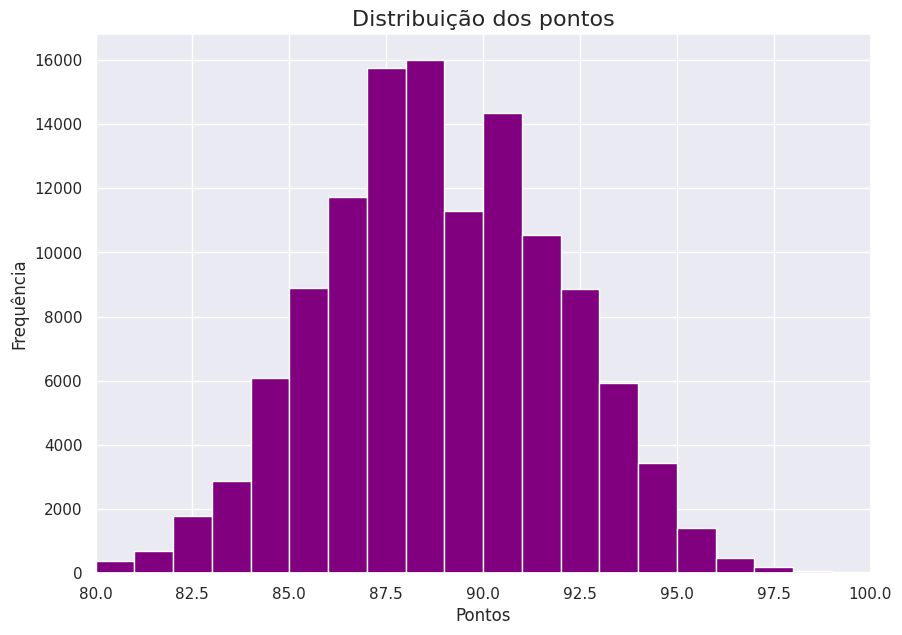

In [ ]:
plt.figure(figsize=(10, 7))
plt.hist(df1['points'],
         bins=np.arange(80, df1['points'].max()+1, 1),
         color='purple')
plt.xlim(80, 100)
plt.title('Distribuição dos pontos', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.show()

# Aqui, cria um gráfico de barras mostrando os 10 países com o maior número de classificações de vinhos. Isso ajuda a identificar quais países têm mais vinhos avaliados no dataset. E podemos notar que Estados Unidos é o país que tem os vinhos mais bem avaliados, seguido por frança, Itália e Portugal...

In [ ]:
country_top_10 = df1['country'].value_counts()[:10]
country_top_10

,count
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294


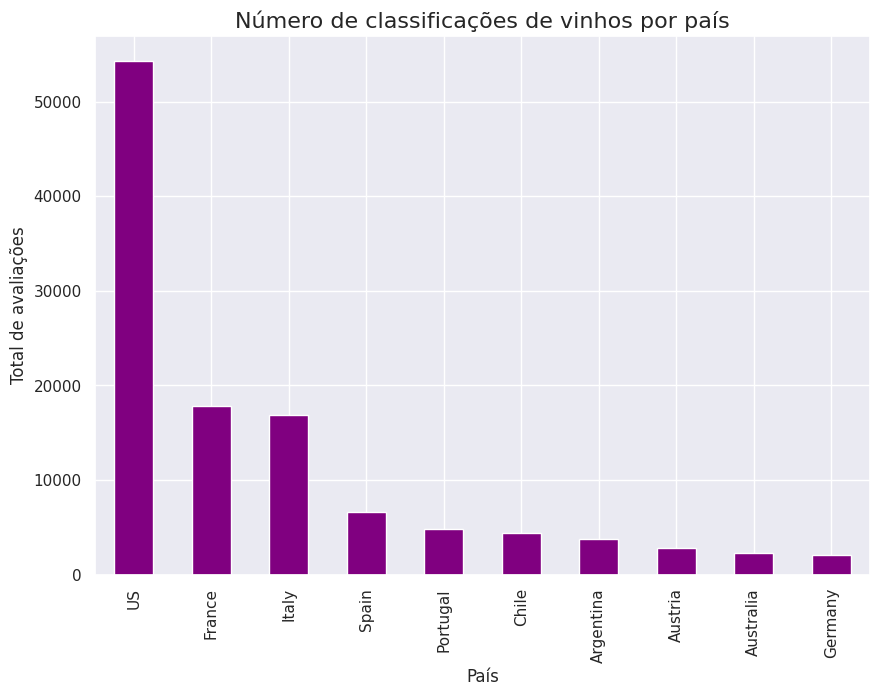

In [ ]:
plt.figure(figsize=(10, 7))
country_top_10.plot(kind='bar', color='purple')
plt.title('Número de classificações de vinhos por país', fontsize=16)
plt.xlabel('País')
plt.ylabel('Total de avaliações')
plt.show()

# Agrupa os vinhos por país e calcula a média de pontos e ordenada os países pela média de pontos, em ordem descrescente. Podemos ver inglaterra em primeiro Lugar

In [ ]:
melhor_qualidade = df1.groupby("country")["points"].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]
melhor_qualidade.to_frame().style.background_gradient(cmap='Purples', high=0.5)


,points
country,
England,91.550725
India,90.222222
Austria,90.190782
Germany,89.836321
Canada,89.377953
Hungary,89.165517
China,89.000000
France,88.734867
Luxembourg,88.666667


# Criação do gráfico de barras horizontais mostrando a média de pontos dos vinhos por país. Apenas os top 10. Nele podemos ver que a Inglaterra é o país com a qualidade de vinho melhor, seguido por India e Austria

<ipython-input-27-f9443548945a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="Purples_r")


Text(0, 0.5, 'País')

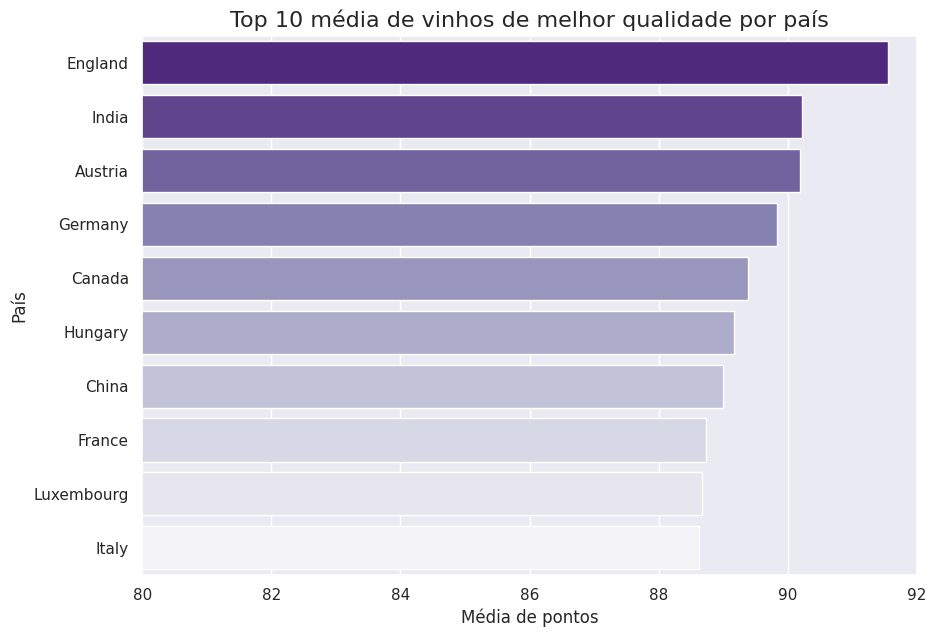

In [ ]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade.values

plt.figure(figsize=(10, 7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette="Purples_r")
plt.title('Top 10 média de vinhos de melhor qualidade por país', fontsize=16)
plt.xlabel("Média de pontos")
plt.ylabel("País")


# Filtra os vinhos com pontuação superior ou igual a 95 e conta quantos vinhos com alta pontuação há em cada país. Aqui podemos notar que Estados Unidos é o melhor, seguido por França, Itália e Austria

In [ ]:
high_scores = df1[df1['points']>=95]
high_scores["country"].value_counts()

,count
country,
US,991
France,509
Italy,326
Austria,103
Portugal,96
Germany,62
Spain,51
Australia,47
Argentina,11


# Cria um gráfico de caixas para -boxplot para visualizar a distribuição das pontuações dos vinhos por país. Podemos ver países como Portugal com pontuação 100 de qualidade de vinho, porém não aparece inglaterra

Text(0, 0.5, 'País')

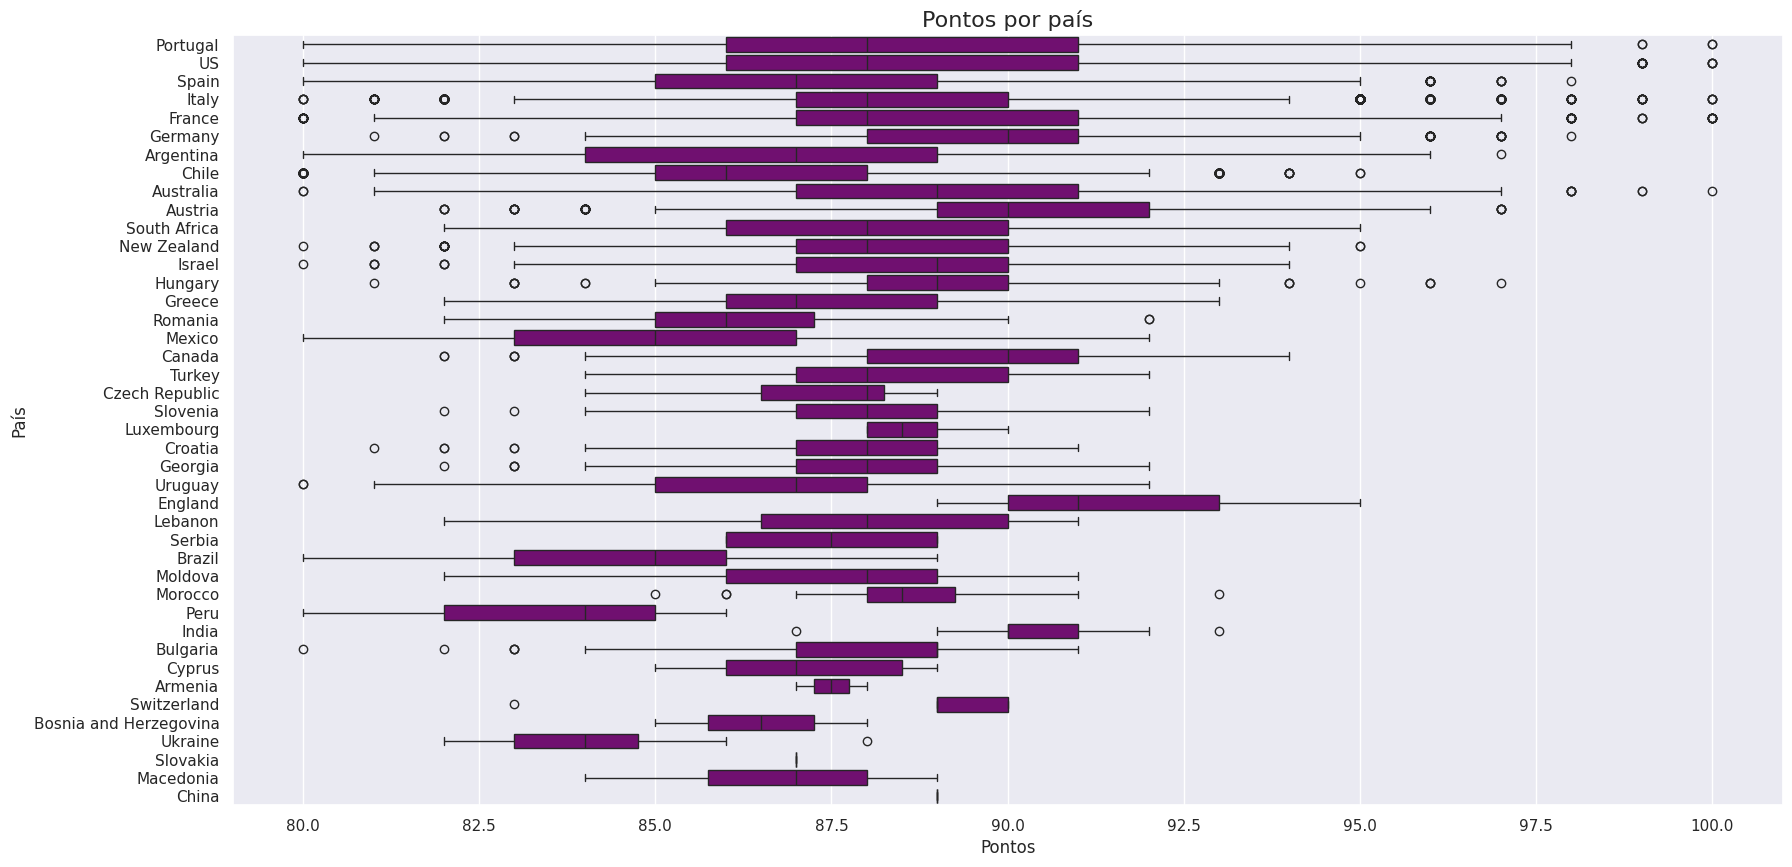

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df1, x='points', y='country', color='purple')
plt.title('Pontos por país', fontsize=16)
plt.xlabel("Pontos")
plt.ylabel("País")


# Agrupa os vinhos por país e calcula a média do preço de cada um e depois cria um gráfico de barras mostrando o preço médio por país. Nesse gráfico podemos notar que a Suiça onde vende os vinhos mais caros

<ipython-input-31-52b72a198e3a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

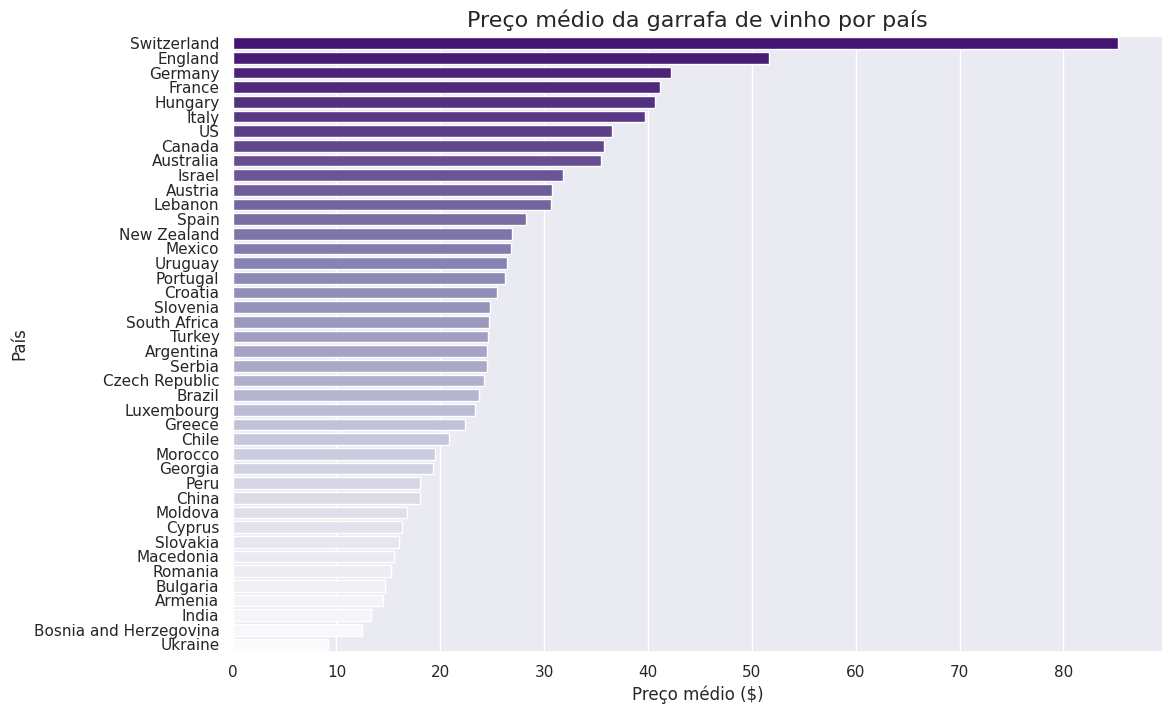

In [ ]:
average_price = df1.groupby("country")["price"].mean()
average_price = average_price.sort_values(ascending=False)
y = average_price.index.to_series()
x = average_price.values

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Preço médio da garrafa de vinho por país', fontsize=16)
plt.xlabel('Preço médio ($)')
plt.ylabel('País')


# Define os intervalos de preços no histograma com binários de 5 unidades e depois cria o gráfico. Podemos ver uma grande frequência nos vinhos de $25

Text(0, 0.5, 'Frequência')

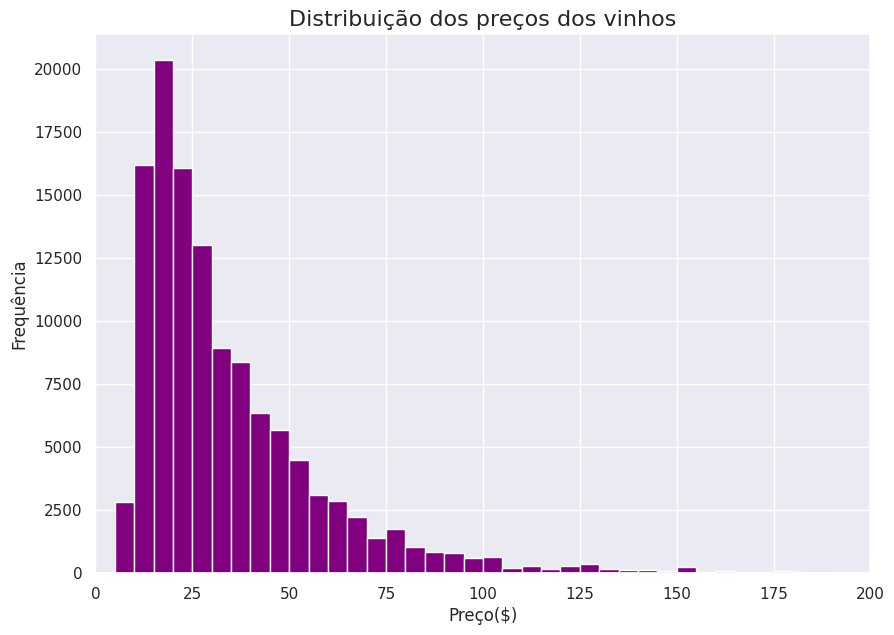

In [ ]:
plt.figure(figsize=(10, 7))
bins = np.arange(0, df1["price"].max()+5, 5)
plt.hist(data=df1, x='price', bins=bins, color="purple")
plt.xlim(0, 200)
plt.title("Distribuição dos preços dos vinhos", fontsize=16)
plt.xlabel("Preço($)")
plt.ylabel("Frequência")


In [ ]:
df1["price"].describe()

,price
count,120915.000000
mean,35.368796
std,41.031188
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [ ]:
np.log10(df1["price"]).describe()

,price
count,120915.000000
mean,1.439570
std,0.284082
min,0.602060
25%,1.230449
50%,1.397940
75%,1.623249
max,3.518514


# Utiliza um gráfico de regressão para mostrar a relação entre o preço das garrafas de vinho e sua pontuação. O eixo x está em escala logarítmica para melhor visualização, e o gráfico inclui pontos dispersos representando cada vinho. Podemos notar uma alta qualidade entre 10 e 30 dólares

Text(0, 0.5, 'Frequência')

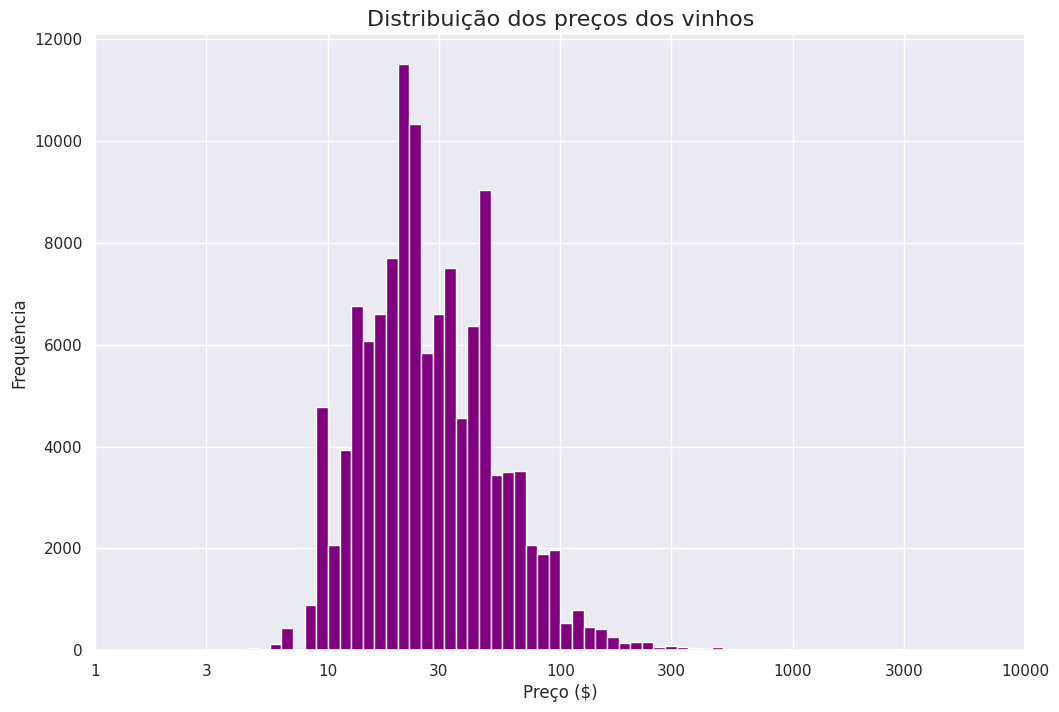

In [ ]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x='price', bins=bins, color="purple")
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')


# Cria um gráfico de regressão mostrando a relação entre o preço dos vinhos e sua pontuação. O eixo x está em escala logarítmica, o que ajuda a visualizar melhor os dados, especialmente quando há uma grande variação nos preços.

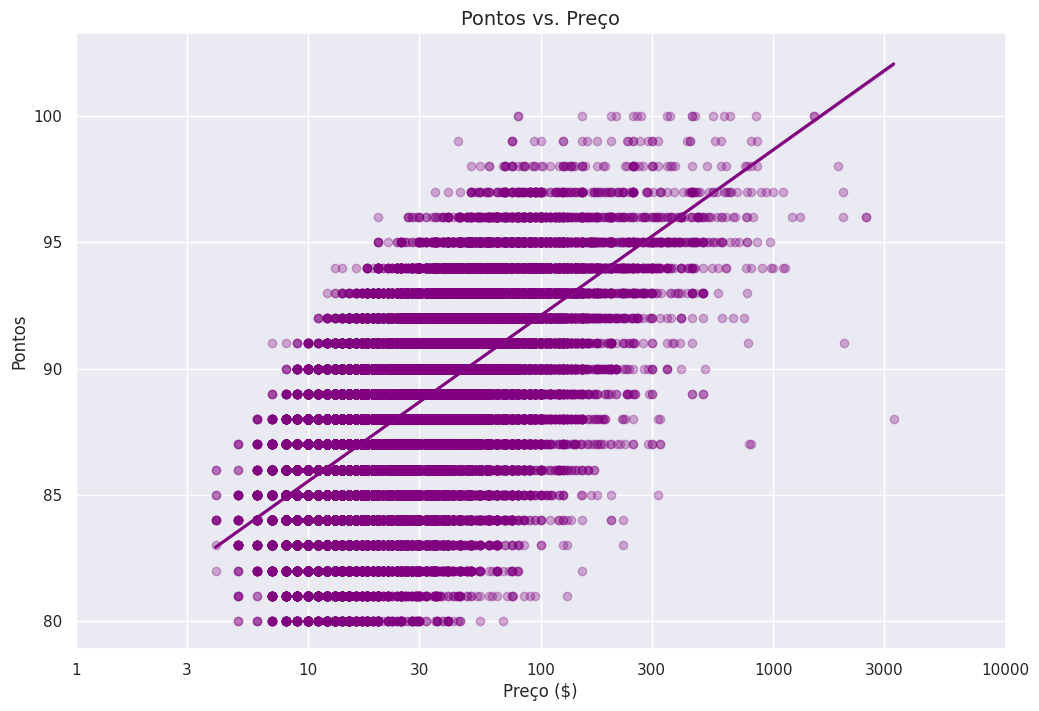

In [ ]:
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=df1, color="purple", logx=True, scatter_kws={'alpha': 0.3})
plt.title("Pontos vs. Preço", fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel("Preço ($)")
plt.ylabel("Pontos")
plt.show()


# Filtra o conjunto de dados para encontrar o vinho com o menor preço e retorna a primeira entrada encontrada.

In [ ]:
df1[df1["price"] == df1['price'].min()][:1]

,country,description,points,price,province,title,variety,winery,points_binned
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis,"(84, 86]"


# Filtra o conjunto de dados para encontrar o vinho com o maior preço e retorna a primeira entrada encontrada.

In [ ]:
df1[df1["price"] == df1['price'].max()][:1]

,country,description,points,price,province,title,variety,winery,points_binned
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,"(86, 88]"


# Conta as diferentes variedades de uva no conjunto de dados e retorna as 20 variedades mais comuns.

In [ ]:
df1["variety"].value_counts()[:20]

,count
variety,
Pinot Noir,12785
Chardonnay,11077
Cabernet Sauvignon,9384
Red Blend,8466
Bordeaux-style Red Blend,5340
Riesling,4971
Sauvignon Blanc,4780
Syrah,4086
Rosé,3261


# Cria um boxplot para mostrar a distribuição das pontuações dos vinhos para as 20 variedades mais comuns. Isso permite comparar a qualidade de diferentes variedades de uva.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Riesling'),
  Text(6, 0, 'Sauvignon Blanc'),
  Text(7, 0, 'Syrah'),
  Text(8, 0, 'Rosé'),
  Text(9, 0, 'Merlot'),
  Text(10, 0, 'Zinfandel'),
  Text(11, 0, 'Malbec'),
  Text(12, 0, 'Sangiovese'),
  Text(13, 0, 'Nebbiolo'),
  Text(14, 0, 'Portuguese Red'),
  Text(15, 0, 'White Blend'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Tempranillo'),
  Text(18, 0, 'Rhône-style Red Blend'),
  Text(19, 0, 'Pinot Gris')])

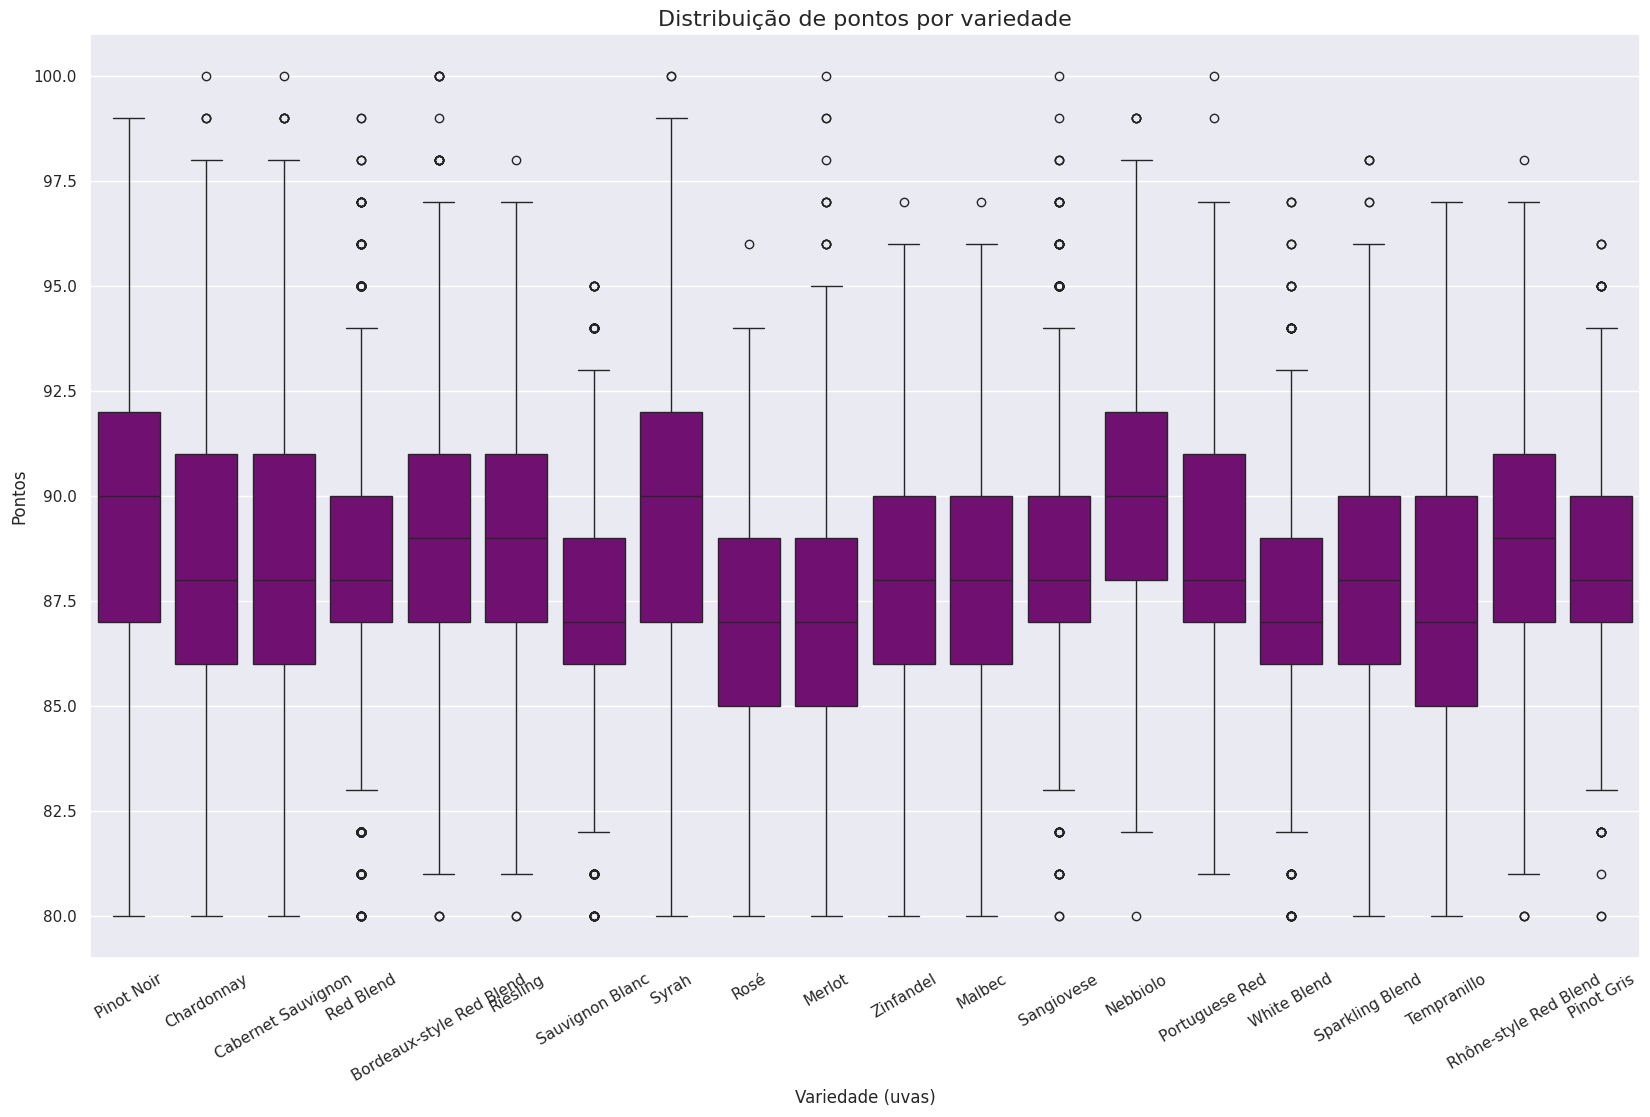

In [ ]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=df1,
            x='variety',
            y='points',
            color='purple',
            order=df1['variety'].value_counts().iloc[:20].index)
plt.title('Distribuição de pontos por variedade', fontsize=16)
plt.xlabel('Variedade (uvas)')
plt.ylabel('Pontos')
plt.xticks(rotation=30)


# Filtra os vinhos com preço até 15 dólares, removendo colunas irrelevantes e ordenando por pontos. Exibe os 10 vinhos com melhor pontuação nesse intervalo, aplicando um gradiente de cores nos preços. Aqui vemos que por um preço abaixo de 15 dólares e com uma boa qualidade, a Espanha é o melhor país

In [ ]:
under_15 = df1.drop(["description", "province", "winery"], axis=1)
under_15 = under_15[under_15["price"] <= 15]
under_15 = under_15.sort_values(by="points", ascending=False)[:10]
under_15.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,title,variety,points_binned
19136,Spain,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry,"(92, 94]"
23974,Portugal,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red,"(92, 94]"
12255,South Africa,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon,"(92, 94]"
129572,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé,"(92, 94]"
37882,Australia,93,15.000000,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend,"(92, 94]"
74042,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé,"(92, 94]"
52776,US,93,14.000000,Uvaggio 2009 Vermentino (Lodi),Vermentino,"(92, 94]"
43193,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier,"(92, 94]"
9609,France,93,13.000000,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot,"(92, 94]"
59823,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier,"(92, 94]"


# Filtra os vinhos que custam entre 15 e 30 dólares, removendo colunas desnecessárias e ordenando por pontos. Exibe os 10 melhores vinhos nesse intervalo com um gradiente de cores nos preços. Aqui podemos ver que nessa faixa de preço e com uma qualidade boa, a Austrai sai na frente.

In [ ]:
between_15_and_30 = df1.drop(["description", "province", "winery"], axis=1)
between_15_and_30 = between_15_and_30.query("price > 15 and price <= 30")
between_15_and_30 = between_15_and_30.sort_values(by="points", ascending=False)[:10]
between_15_and_30.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,title,variety,points_binned
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling,"(94, 96]"
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay,"(94, 96]"
45992,France,96,28.000000,Château Filhot 2014 Sauternes,Bordeaux-style White Blend,"(94, 96]"
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay,"(94, 96]"
119658,Spain,96,30.000000,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez,"(94, 96]"
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah,"(94, 96]"
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling,"(94, 96]"
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico,Red Blend,"(94, 96]"
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir,"(94, 96]"
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache,"(94, 96]"


# Filtra os vinhos com preço entre 30 e 50 dólares, realizando as mesmas operações de limpeza e ordenação, e exibe os 10 melhores com um gradiente de cores. Aqui entre essa faixa de preço podemos notar que os Estados Unidos sai na frente.

In [ ]:
between_30_and_50 = df1.drop(["description", "province", "winery"], axis=1)
between_30_and_50 = between_30_and_50.query("price > 30 and price <= 50")
between_30_and_50 = between_30_and_50.sort_values(by="points", ascending=False)[:10]
between_30_and_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,title,variety,points_binned
118059,US,99,44.000000,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay,"(98, 100]"
1560,US,98,50.000000,Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend,"(96, 98]"
47432,US,97,50.000000,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay,"(96, 98]"
4504,US,97,50.000000,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel,"(96, 98]"
114981,US,97,35.000000,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah,"(96, 98]"
45986,France,97,45.000000,Château Coutet 2014 Barsac,Bordeaux-style White Blend,"(96, 98]"
125831,US,97,50.000000,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay,"(96, 98]"
16524,Portugal,97,40.000000,Taylor Fladgate NV 325 Anniversary (Port),Port,"(96, 98]"
128268,US,97,50.000000,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon,"(96, 98]"
89730,France,97,50.000000,René Muré 2015 Clos Saint Landelin Vorbourg Grand Cru Riesling (Alsace),Riesling,"(96, 98]"


# Filtra os vinhos que custam mais de 50 dólares, removendo as mesmas colunas e ordenando por pontos. Exibe os 10 melhores vinhos nesse intervalo com um gradiente de cores nos preços. Aqui também os Estados Unidos sai na frente

In [ ]:
under_50 = df1.drop(["description", "province", "winery"], axis=1)
under_50 = under_50.query("price > 50")
under_50 = under_50.sort_values(by="points", ascending=False)[:10]
under_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,title,variety,points_binned
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah,"(98, 100]"
111755,France,100,1500.000000,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,"(98, 100]"
89728,France,100,250.000000,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend,"(98, 100]"
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah,"(98, 100]"
118058,US,100,450.000000,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,"(98, 100]"
89729,France,100,617.000000,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay,"(98, 100]"
45781,Italy,100,550.000000,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese,"(98, 100]"
111753,France,100,1500.000000,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,"(98, 100]"
111754,Italy,100,270.000000,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Sangiovese Grosso,"(98, 100]"
42197,Portugal,100,450.000000,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,"(98, 100]"


# Aqui basicamente está filtrando as palavras que mais aparecem pela descrição e cria um balãozinho para visualizar

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df1["description"])
length_of_text = len(text)
print(length_of_text)


29653210


In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(("drink", "now", "wine", "flavor", "flavors"))

wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
    width=2048,
    height=1024,
    max_words=1000
).generate(text)


(-0.5, 2047.5, 1023.5, -0.5)

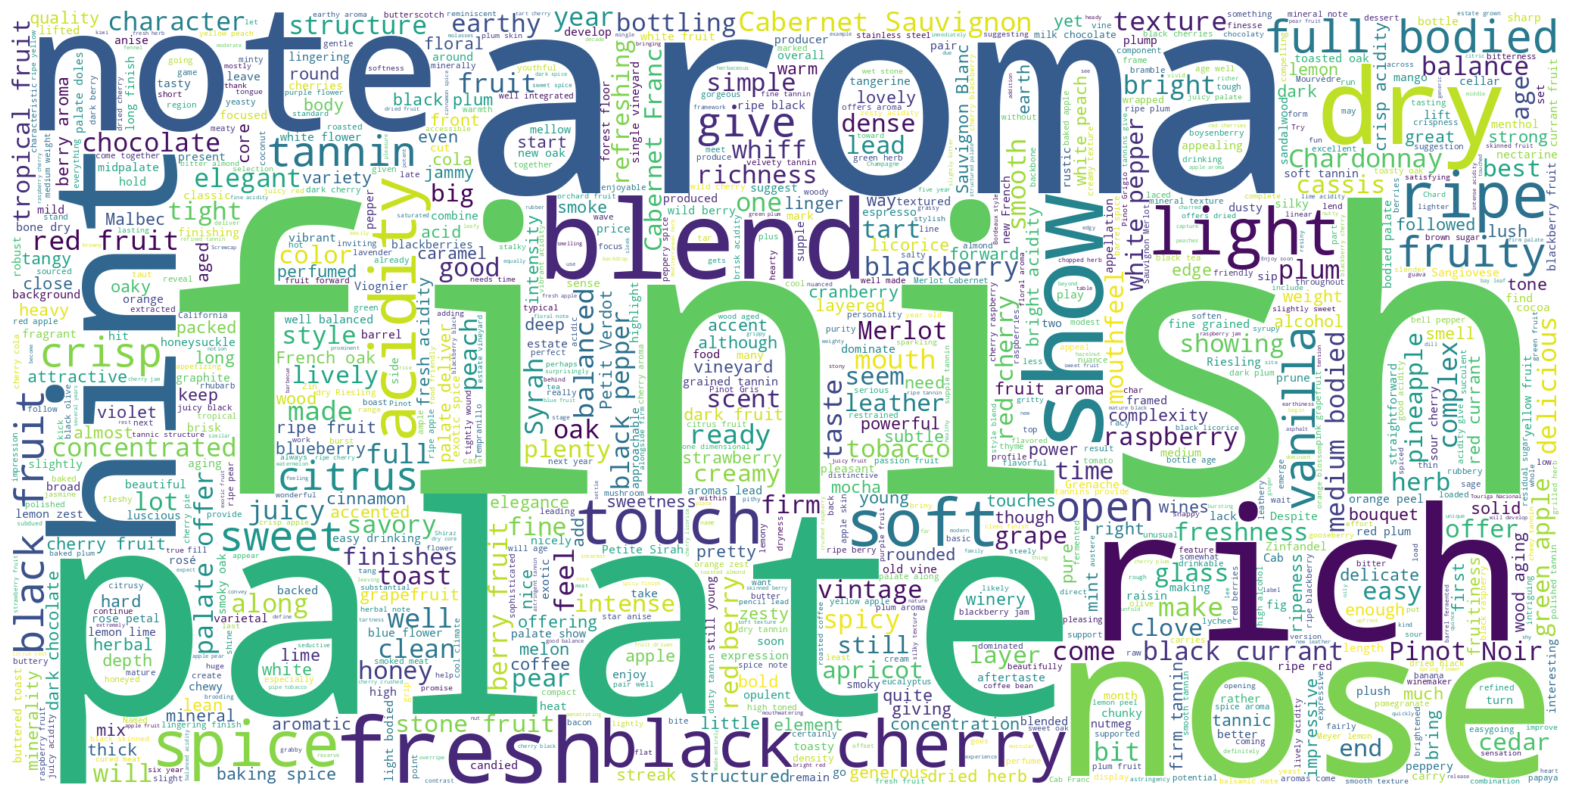

In [ ]:
plt.figure(figsize=(20, 18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")


**De onde vem o melhor vinho ?**

R: A inglaterra é quem em média produz vinhos soberbos. Mas se você quiser uma garrafa com pontuação perfeita de 100 deve observar os vinhos de outros países: França, Itália, EUA, Portugal ou Austrália.


**O preço do vinho está relacionado com a qualidade ?**

R: É nítido que o preço do vinho relacionado com a qualidade. Mas se você souber onde procurar, pode encontrar um vinho de 4 dólares que possui apenas 3 pontos abaixo de uma garrafa que custa $3.300.

**Certas variedades de uvas são de maior qualidade ?**

R: Todas as variedades estão na mesma situação níveladas. A maior aposta com base nos dados é Pinot Noir

**Qual é o melhor vinho em cada faixa de preço ?**

R: Encontramos um vinho perfeito para cada orçamento. Com alguns destaques.

**Que palavras são mais utilizadas para descrever um vinho ?**

R: Como pudemos ver na nuvem de palavras, certos termos aparecem uma vez ou outra nas descrições, termos como *finish* e *plate* aparecem em boa parte das avaliações.

## ABAIXO ESTÁ MAIS DUAS QUESTÕES E SEUS RESPECTIVOS CÓDIGOS + EXPLICAÇÕES

**Qual é a correlação entre o preço e a pontuação dos vinhos?**

R: O gráfico mostra que existe uma correlação positiva moderada 0.42 entre o preço e os pontos dos vinhos. Isso significa que, em geral, vinhos mais caros tendem a receber pontuações mais altas, mas essa relação não é muito forte. Ou seja, embora o preço possa influenciar a qualidade percebida, outros fatores também desempenham um papel importante.



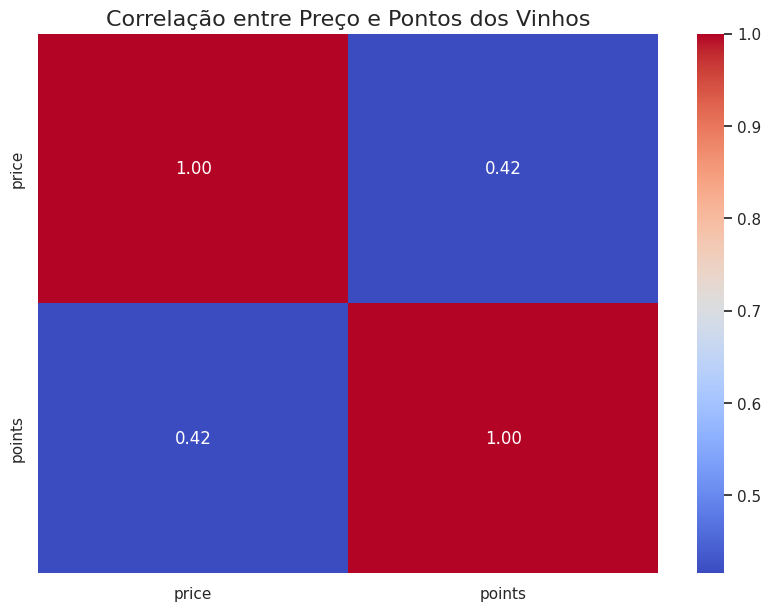

In [ ]:
plt.figure(figsize=(10, 7))
correlation_matrix = df1[['price', 'points']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Preço e Pontos dos Vinhos', fontsize=16)
plt.show()

**Quais são as 10 variedades de vinhos mais bem avaliadas com base na média de pontos?**

R: O gráfico mostra as 10 principais variedades de vinho com maior média de pontuação, destacando o Terrantez como o mais bem avaliado, seguido por outras variedades também altamente classificadas.

<ipython-input-71-9eae560083a7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Média de Pontos', y='Variedade', data=top_varieties_df, palette='Purples_r')


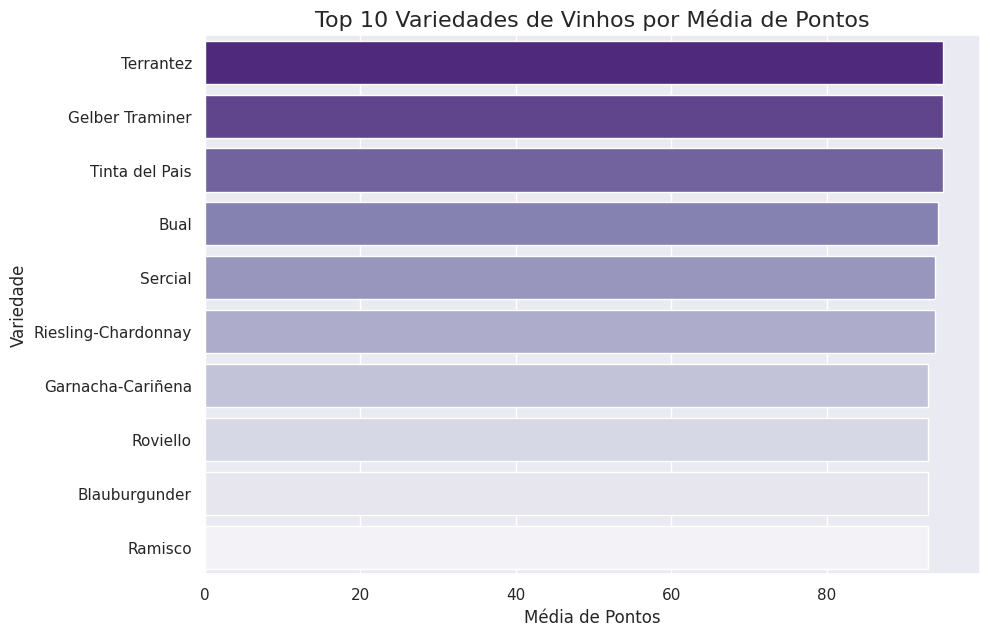

In [ ]:
top_varieties = df1.groupby("variety")["points"].mean().sort_values(ascending=False)[:10]
top_varieties_df = top_varieties.to_frame().reset_index()
top_varieties_df.columns = ['Variedade', 'Média de Pontos']

plt.figure(figsize=(10, 7))
sns.barplot(x='Média de Pontos', y='Variedade', data=top_varieties_df, palette='Purples_r')
plt.title('Top 10 Variedades de Vinhos por Média de Pontos', fontsize=16)
plt.xlabel('Média de Pontos')
plt.ylabel('Variedade')
plt.show()